In [1]:
!pip install matplotlib scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

In [3]:
# Step 1: Generate 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

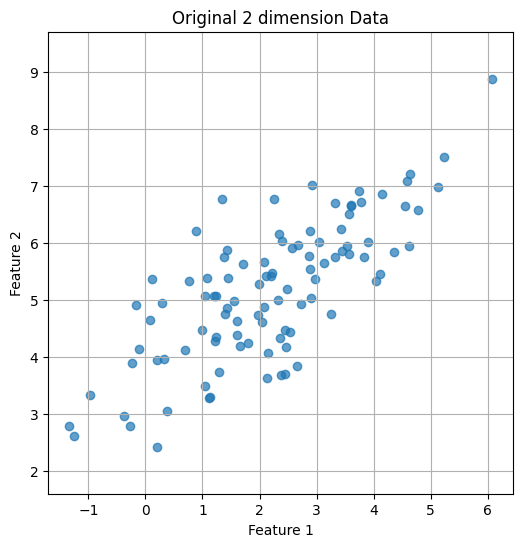

In [15]:
# Step 2: Plot original data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2 dimension Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

In [5]:
# Step 3: Center the data
X_centered = X - np.mean(X, axis=0)

In [6]:
# Step 4: Compute covariance matrix
cov_matrix = np.cov(X_centered.T)

# Step 5: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [7]:
# Step 6: Project onto first principal component
PC1 = eigenvectors[:, 0]
X_pca = X_centered @ PC1

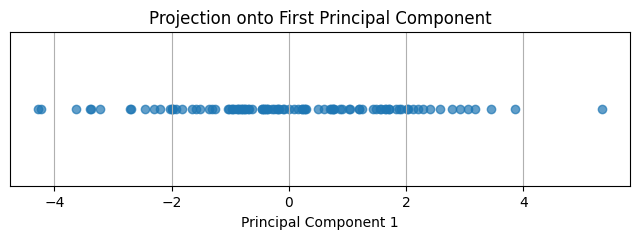

In [8]:
# Plot 1D projection
plt.figure(figsize=(8, 2))
plt.scatter(X_pca, np.zeros_like(X_pca), alpha=0.7)
plt.title("Projection onto First Principal Component")
plt.xlabel("Principal Component 1")
plt.yticks([])
plt.grid(True)
plt.show()


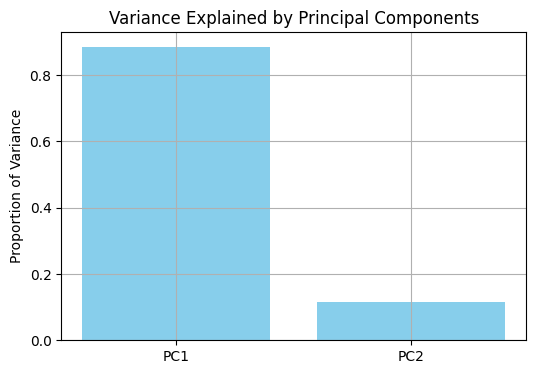

In [9]:
# Step 7: Plot variance explained
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.figure(figsize=(6, 4))
plt.bar(['PC1', 'PC2'], explained_variance_ratio, color='skyblue')
plt.title("Variance Explained by Principal Components")
plt.ylabel("Proportion of Variance")
plt.grid(True)
plt.show()

In [10]:
print("Explained variance ratio:", explained_variance_ratio)

Explained variance ratio: [0.8844829 0.1155171]


In [11]:
# ========== Part 2: t-SNE on Digits Dataset ==========

In [12]:
# Load digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print("Digits dataset shape:", X_digits.shape)
print("Label shape:", y_digits.shape)
print("Each sample has 64 features (8x8 grayscale pixel values)")

Digits dataset shape: (1797, 64)
Label shape: (1797,)
Each sample has 64 features (8x8 grayscale pixel values)


In [13]:
# Function to run and plot t-SNE
def tsne_visualize(perplexity):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_embedded = tsne.fit_transform(X_digits)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_digits, cmap='tab10', s=15)
    plt.title(f"t-SNE (Perplexity={perplexity})")
    plt.colorbar(scatter, ticks=range(10), label="Digit Label")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.grid(True)
    plt.show()

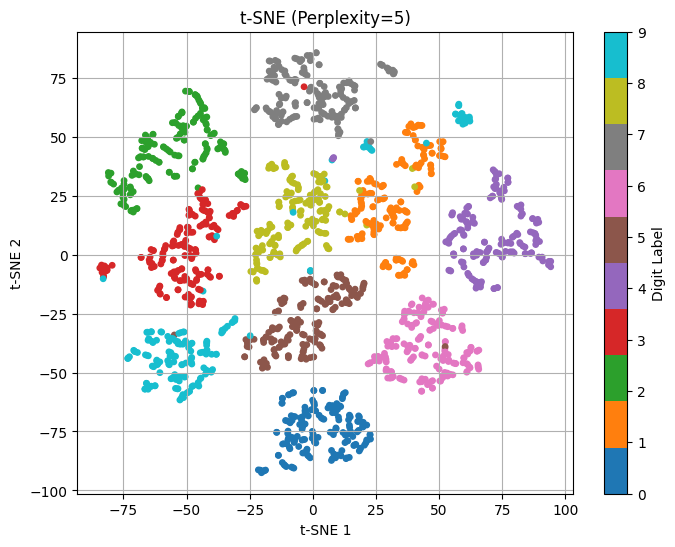

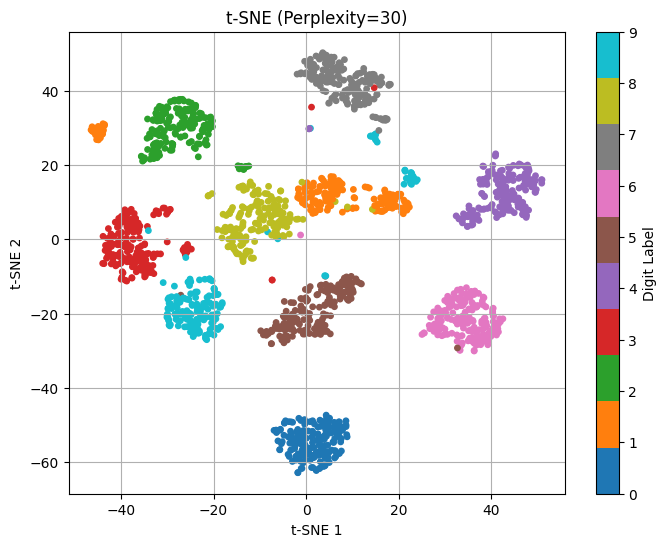

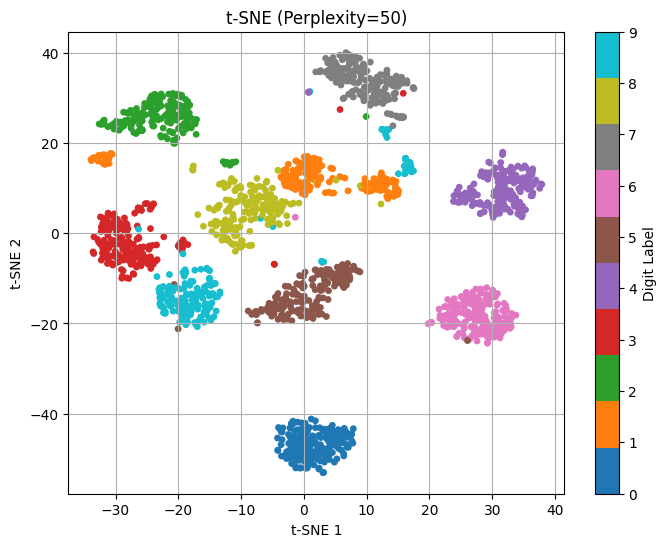

In [14]:
# Run t-SNE with different perplexities
for p in [5, 30, 50]:
    tsne_visualize(perplexity=p)